# SALES PREDICTION AND FORECASTING USING LSTM 

We will be using LSTM units to predict the sales values and also forecast into the future. As LSTM performs better than SimpleRNN units, we will be utilizing the former for best results.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv("D:\\RUPA\\GIT - PREDICTION\\Frozen_Dessert_Production.csv", parse_dates=True, index_col='DATE')

In [4]:
df.head()

,IPN31152N
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636


In [5]:
#rename column
df.columns=['actual sales'] 

<Axes: xlabel='DATE'>

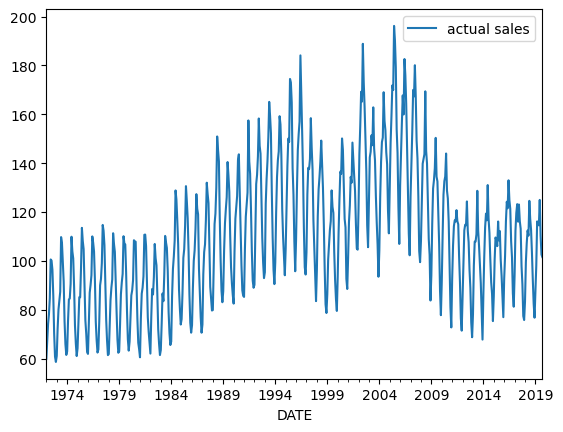

In [6]:
df.plot()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 573 entries, 1972-01-01 to 2019-09-01
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   actual sales  573 non-null    float64
dtypes: float64(1)
memory usage: 9.0 KB


In [8]:
#train test split. We have only inputs here, no outputs
test_percent=0.03
test_index=int(len(df)-(np.round(len(df)*test_percent)))
train=df.iloc[:test_index]
test=df.iloc[test_index:]

In [9]:
#scaling
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaled_train=scaler.fit_transform(train)
scaled_test=scaler.transform(test)

In [10]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [11]:
len(test)

17

In [17]:
#train data generator
length=15   #lesser than len(test), big enough to capture trend
batch_size=1  #process 1 batch at a time
train_generator=TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=batch_size)

In [13]:
#validation data generator
validation_generator=TimeseriesGenerator(scaled_test, scaled_test, length=length, batch_size=1)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM

In [15]:
#EarlyStop
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss', patience=2)

In [16]:
n_features=1

In [18]:
#MODEL FOR PREDICTION OF TEST DATA
model=Sequential()
model.add(LSTM(100, input_shape=(length, n_features)))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
model.fit(train_generator, epochs=20, callbacks=[early_stop], validation_data=validation_generator)

C:\Users\yrupa\anaconda3\envs\py3124\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20


C:\Users\yrupa\anaconda3\envs\py3124\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


541/541 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 0.0307 - val_loss: 0.0016
Epoch 2/20
541/541 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0057 - val_loss: 0.0048
Epoch 3/20
541/541 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0048 - val_loss: 0.0020


<Axes: >

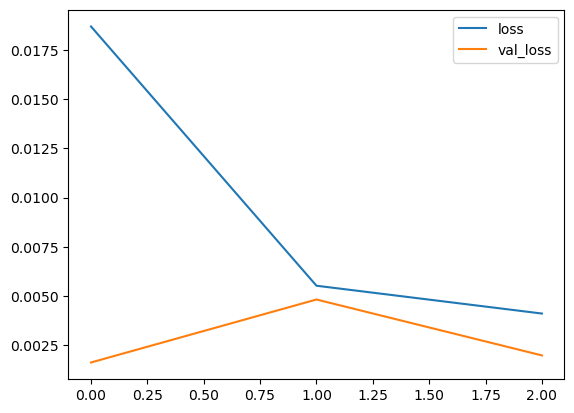

In [19]:
loss=pd.DataFrame(model.history.history)
loss.plot()

In [21]:
#predict test series and comapre with actual test
test_pred=[]
#last 15 data points of train data will be used for predicting the 1st test data point
first_eval_batch=scaled_train[-length:]
current_batch=first_eval_batch.reshape((1, length, n_features))
for i in range (len(test)):  #predict all the 17 test data points
 #predict the data point given the last 15 data points
 current_pred=model.predict(current_batch)[0]
 #append to the prediction list
 test_pred.append(current_pred)
 #remove the 1st data point of the training batch and include the predicted data point. This will be the new training batch
 current_batch=np.append(current_batch[:,1:,:],[[current_pred]], axis=1) 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


In [22]:
#since the results are scaled, perform inverse scaling
true_pred=scaler.inverse_transform(test_pred)

In [23]:
true_pred

array([[122.48438245],
       [123.22857659],
       [119.02951826],
       [110.063243  ],
       [ 97.37663638],
       [ 86.77970677],
       [ 82.32557643],
       [ 86.33694386],
       [ 95.51667766],
       [107.17441045],
       [117.73896402],
       [125.41141874],
       [128.78958448],
       [127.31058526],
       [120.10381692],
       [108.09779575],
       [ 95.69977444]])

In [24]:
test

,actual sales
DATE,
2018-05-01,110.3544
2018-06-01,124.5841
2018-07-01,117.2215
2018-08-01,112.6779
2018-09-01,103.3118
2018-10-01,92.1321
2018-11-01,82.4347
2018-12-01,76.7608
2019-01-01,86.9988


In [25]:
test.columns=['actual']

In [26]:
test['prediction']=true_pred

C:\Users\yrupa\AppData\Local\Temp\ipykernel_12196\654341122.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction']=true_pred


In [27]:
test

,actual,prediction
DATE,,
2018-05-01,110.3544,122.484382
2018-06-01,124.5841,123.228577
2018-07-01,117.2215,119.029518
2018-08-01,112.6779,110.063243
2018-09-01,103.3118,97.376636
2018-10-01,92.1321,86.779707
2018-11-01,82.4347,82.325576
2018-12-01,76.7608,86.336944
2019-01-01,86.9988,95.516678


<Axes: xlabel='DATE'>

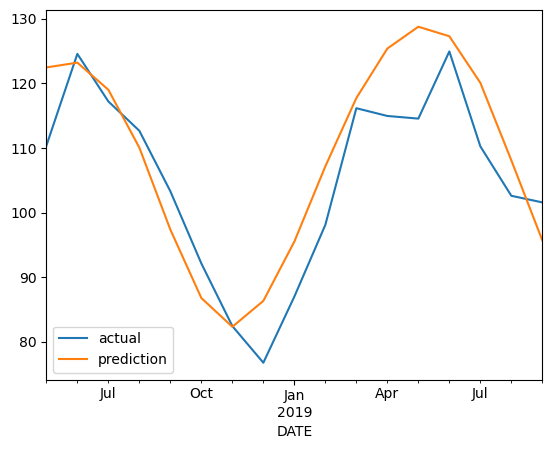

In [28]:
test.plot()

In [29]:
#FORECAST
#normalising entire data
full_scaler=MinMaxScaler()
scaled_data=full_scaler.fit_transform(df)

In [30]:
full_generator=TimeseriesGenerator(scaled_data, scaled_data, length=length, batch_size=1)

In [31]:
model=Sequential()
model.add(LSTM(100, input_shape=(length, n_features)))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
model.fit(full_generator, epochs=4)

Epoch 1/4


C:\Users\yrupa\anaconda3\envs\py3124\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


 25/558 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0610

C:\Users\yrupa\anaconda3\envs\py3124\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


558/558 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0234
Epoch 2/4
558/558 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0057
Epoch 3/4
558/558 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0035
Epoch 4/4
558/558 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0035


<Axes: >

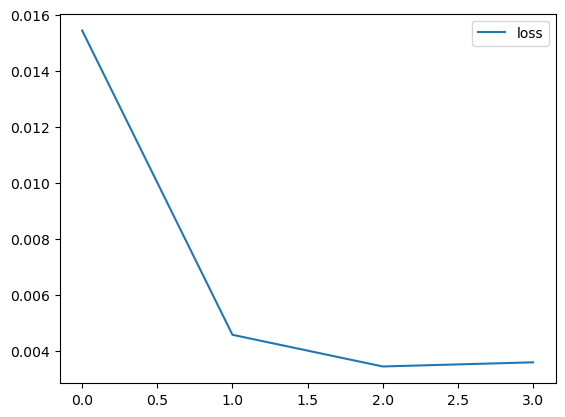

In [32]:
loss=pd.DataFrame(model.history.history)
loss.plot()

In [33]:
#forecast the series
forecast=[]
#consider last 15 points of entire dataset to predict the 1st forecasted data point
first_eval_batch=scaled_data[-length:]
current_batch=first_eval_batch.reshape((1, length, n_features))
#forecast 20 data points into the future
for i in range (20):
 current_forecast=model.predict(current_batch)[0]
 forecast.append(current_forecast)
 current_batch=np.append(current_batch[:,1:,:],[[current_forecast]], axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


In [34]:
true_forecast= full_scaler.inverse_transform(forecast)

In [35]:
true_forecast.shape

(20, 1)

In [36]:
true_forecast

array([[ 85.82928337],
       [ 79.70700394],
       [ 81.63605683],
       [ 90.4272535 ],
       [102.52999298],
       [114.3528518 ],
       [123.13260005],
       [128.08268837],
       [127.9304144 ],
       [122.79527855],
       [111.52483293],
       [ 96.14890396],
       [ 83.45050467],
       [ 77.15663015],
       [ 80.24517168],
       [ 91.99217219],
       [106.56191714],
       [120.6356119 ],
       [131.85847293],
       [138.51518456]])

Text(0, 0.5, 'sales forecasted')

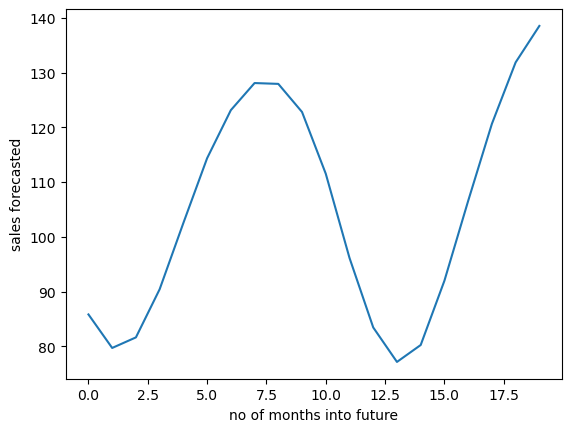

In [37]:
plt.plot(true_forecast)
plt.xlabel('no of months into future')
plt.ylabel('sales forecasted')

## SUMMARY
I was able to use LSTM and EarlyStopping callback method to predict the values, reasonably close to test data. Based on thsi performance, i extended the concept to obtain the forecasted data points using the entire data as training data.